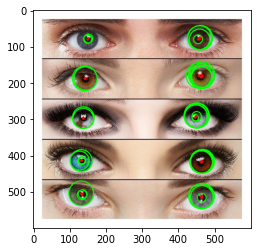

In [48]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

ojos = cv.imread('eyes.jpg', cv.IMREAD_COLOR)
gray = cv.cvtColor(ojos, cv.COLOR_BGR2GRAY)
ojos_blur = cv.medianBlur(gray, 5)


# parametros 
method = cv.HOUGH_GRADIENT
dp = 1 # resolucion del acumulador igual a la de la imagen
minDist = 1 # distancia minima entre centros de los circulos
param1 = 190 # el maximo umbral del detector de Canny
param2 = 25 # umbral del acumulador del detector de centros
minRadius = 5 # radio minimo 
maxRadius = 40 # radio maximo

circles = cv.HoughCircles(ojos_blur, method, dp, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # perimetro
        cv.circle(ojos, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # centro
        cv.circle(ojos, (i[0], i[1]), 2, (0, 0, 255), 3)

ojos = cv.cvtColor(ojos, cv.COLOR_BGR2RGB)
plt.imshow(ojos)
plt.show()